In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 3.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

### Cruise Model
<center><img src='https://drive.google.com/uc?id=1PCgX4bMLkp_0kn6lZmPrKX_SN2rLHn5k'></img></center>

\begin{align}m\dot{v} + bv &= u \\
y &= v
\end{align}

\begin{align}\dot{\bf{x}} = \dot{v} &= [\frac{-b}{m}]v + [\frac{1}{m}]u \\
y&=[1] v
\end{align}

Text(0.5, 1.0, 'Response of a Cruise System')

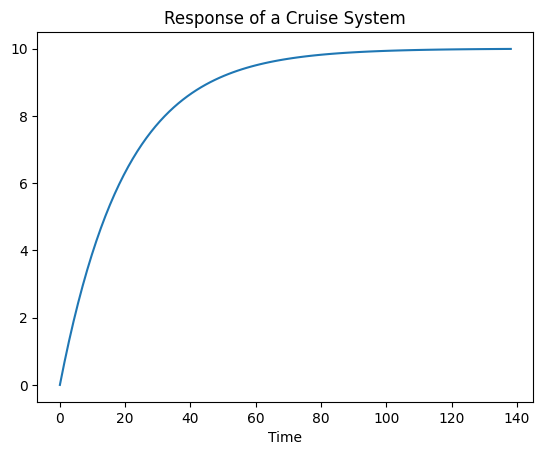

In [4]:
m = 1000
b = 50

A = -b/m
B = 1/m
C = 1
D = 0

G = ctl.ss(A, B, C, D)

input = 500
t,y = ctl.step_response(500*G)
plt.plot(t,y)
plt.xlabel('Time')
plt.title('Response of a Cruise System')

### Motor Model
<center><img src='https://drive.google.com/uc?id=1u3JpghL6rIu7oi5d1Qfbr8LRbU9CyaLp'></img></center>

\begin{align}
J \ddot{\theta} + b \dot{\theta} &= K \cdot i \\
L \frac{di}{dt} + R \cdot i &= V - K \dot{\theta}
\end{align}
$$ $$
\begin{align}
(J \cdot s^2 + b \cdot s) \cdot \Theta(s) &= K \cdot I(s) \\
(L \cdot s + R) \cdot I(s) &= V(s) - K \cdot s \cdot \Theta(s)
\end{align}
$$ $$
$$G(s) = \frac{s \cdot \Theta(s)}{V(s)} = \frac{K}{(J\cdot s+b)(L\cdot s+R)+K^2}$$

Text(0.5, 1.0, 'Response of a Cruise System')

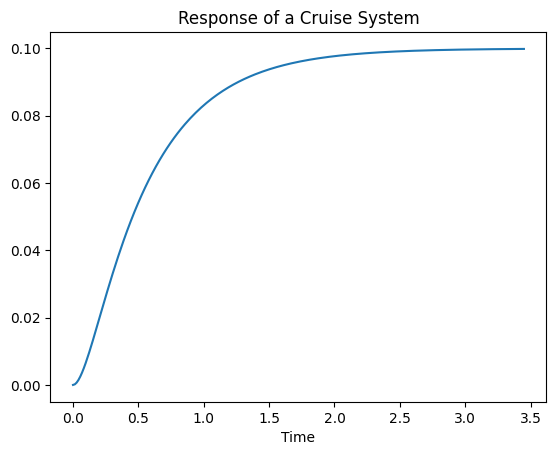

In [8]:
J = 0.01
b = 0.1
K = 0.01
R = 1
L = 0.5
s = ctl.tf([1,0],[1])
G = K/((J*s+b)*(L*s+R)+K**2)

t,y = ctl.step_response(G)
plt.plot(t,y)
plt.xlabel('Time')
plt.title('Response of a Cruise System')